In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

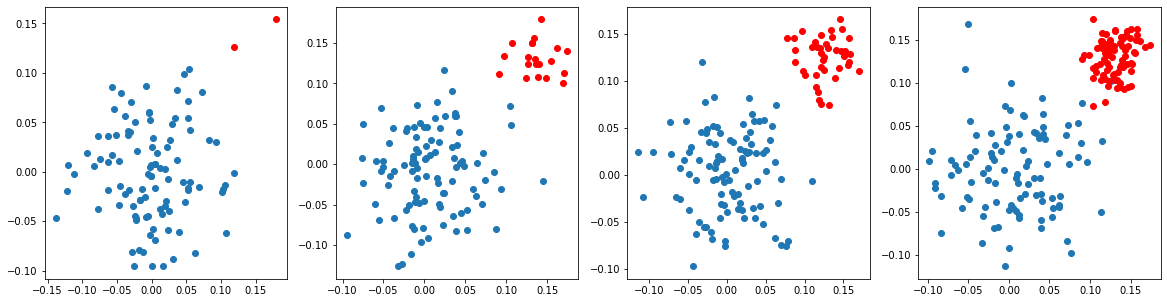

In [3]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

In [ ]:
#you can start writing code here.

# lets start with analysing SVC

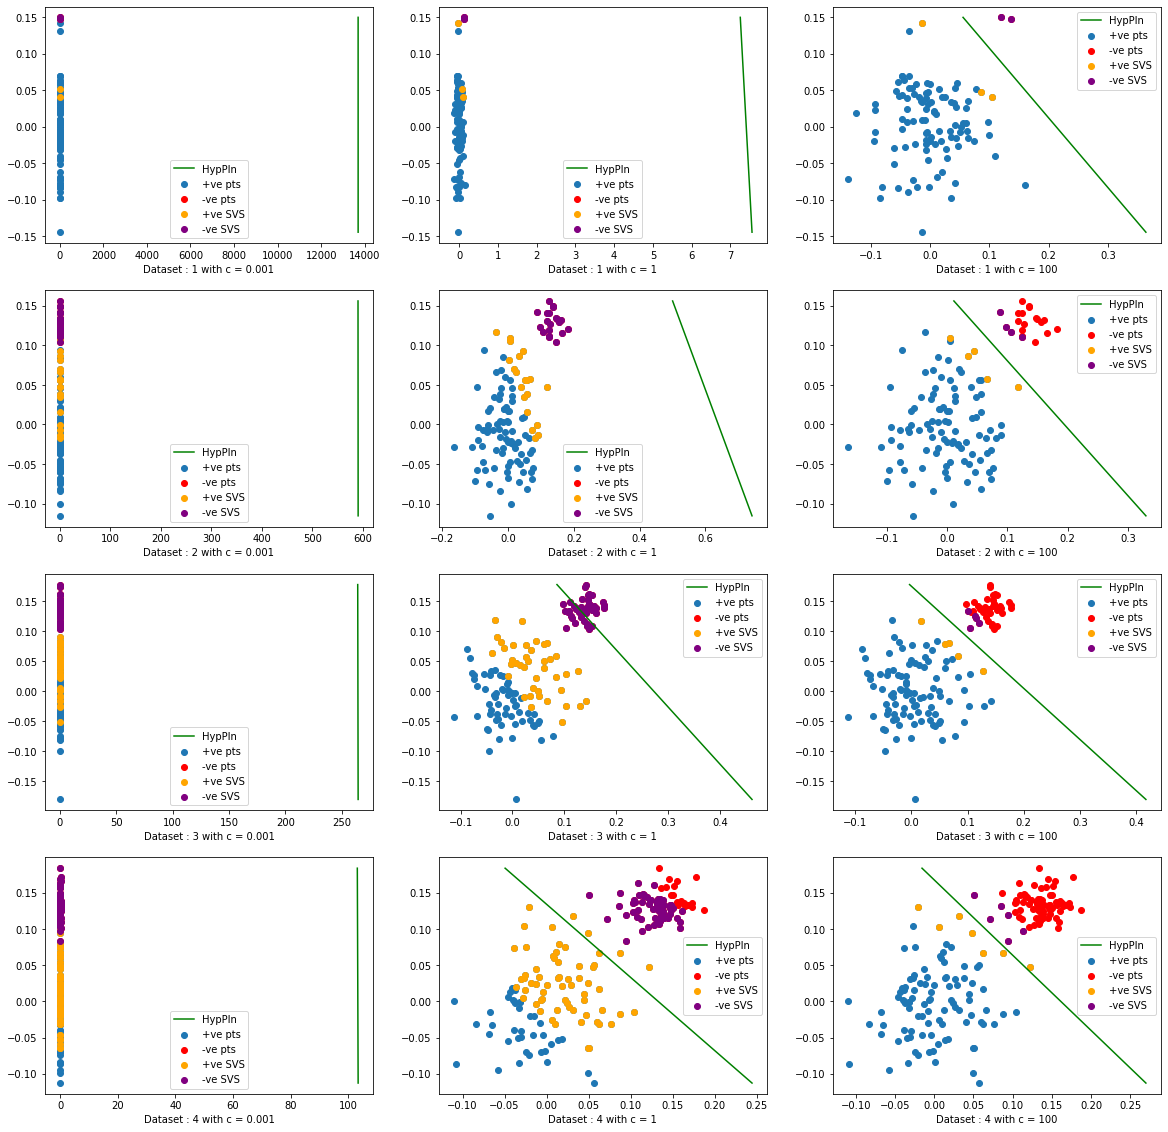

In [68]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,20))
c = [0.001, 1, 100]
k=0
for j,i in enumerate(ratios):
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    for a,b in enumerate(c):
      classif = SVC(C = b, kernel = 'linear').fit(X,y)
      classif_coef = classif.coef_
      classif_support_vectors = classif.support_vectors_ 
      positive_classif_support_vectors = np.array([list(i) for i in classif.support_vectors_ if i in X_p])
      negetive_classif_support_vectors = np.array([list(i) for i in classif.support_vectors_ if i in X_n])
      classif_intercept = classif.intercept_
      min = np.min(X[:,[-1]])
      max = np.max(X[:,[-1]])
      points=np.array([[((-classif_coef[0,1]*min - classif_intercept)/classif_coef[0,0]), min],[((-classif_coef[0,1]*max - classif_intercept)/classif_coef[0,0]), max]])
      plt.subplot(len(ratios), len(c), k+1)
      plt.scatter(X_p[:,0],X_p[:,1])
      plt.scatter(X_n[:,0],X_n[:,1],color='red')
      plt.scatter(positive_classif_support_vectors[:,0],positive_classif_support_vectors[:,1],color='orange')
      plt.scatter(negetive_classif_support_vectors[:,0],negetive_classif_support_vectors[:,1],color='purple')
      plt.plot(points[:,0], points[:,1],color = 'green')
      plt.legend(['HypPln','+ve pts','-ve pts','+ve SVS','-ve SVS'])
      plt.xlabel('Dataset : '+str(j+1) +' with c = ' + str(b))
      k+=1
plt.show()

# Now lets Analyse Logistic Regression

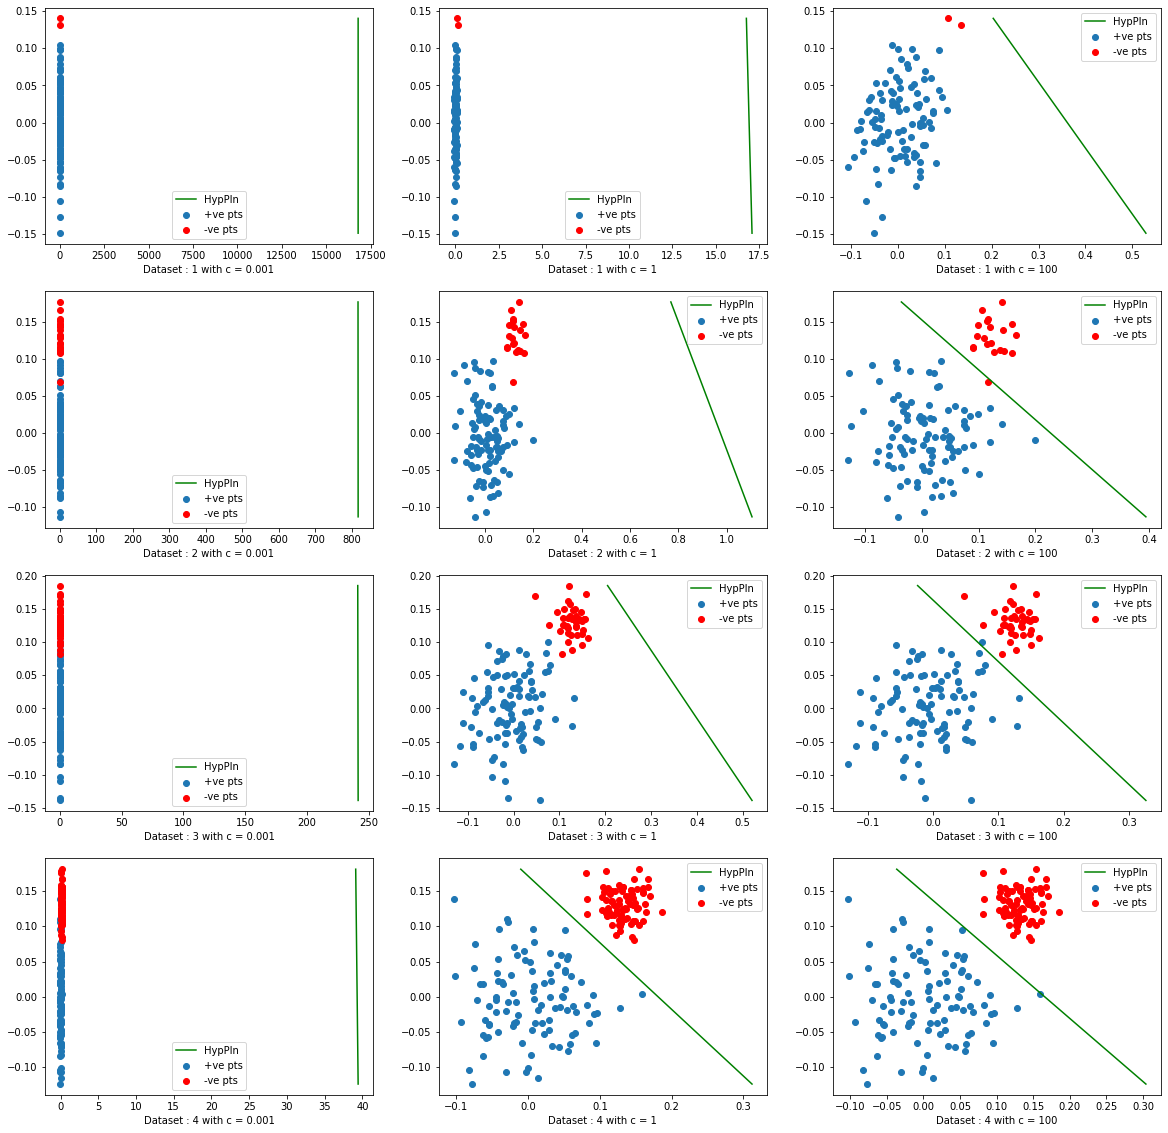

In [48]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,20))
c = [0.001, 1, 100]
k=0
for j,i in enumerate(ratios):
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    for a,b in enumerate(c):
      classif = LogisticRegression(C = b).fit(X,y)
      classif_coef = classif.coef_
      classif_intercept = classif.intercept_
      min = np.min(X[:,[-1]])
      max = np.max(X[:,[-1]])
      points=np.array([[((-classif_coef[0,1]*min - classif_intercept)/classif_coef[0,0]), min],[((-classif_coef[0,1]*max - classif_intercept)/classif_coef[0,0]), max]])
      plt.subplot(len(ratios), len(c), k+1)
      plt.scatter(X_p[:,0],X_p[:,1])
      plt.scatter(X_n[:,0],X_n[:,1],color='red')
      plt.plot(points[:,0], points[:,1],color = 'green')
      plt.legend(['HypPln','+ve pts','-ve pts'])
      plt.xlabel('Dataset : '+str(j+1) +' with c = ' + str(b))
      k+=1
plt.show()

# Observation on SVC with Imbalanced Dataset

## High data imbalance & Low C 

* When c value is low we have negligable hinge loss and  dominant regularisation.
* we have very bad model and hyper plane is far away from the points.
* support vectors are also very less.All points into single class that is majority class

## moderate data imbalance & Low C 

* When c value is low we have negligable hinge loss and  dominant regularisation.
* we have very bad model and hyper plane is far away from the points.but better than highly imbalanced data.
* support vectors increased  but model not making sense.All points into single class that is majority class

## Low data imbalance & Low C 


* When c value is low we have negligable hinge loss and  dominant regularisation.
* we have very bad model and hyper plane is far away from the points.but better than highly and moderately imbalanced data.
* support vectors increased furthur but model not making sense.All points into single class that is majority class
* Hence irrespective of Databalance if the c is low we will get bad model as hingle loss is negligent hence low c underfitting high bias.


## High data imbalance & Moderate C = 1.0

* When c value is moderate we have both hinge loss and  regularisation in action.
* we have bad model and hyper plane is far away from the points.
* support vectors are also very less.All points into single class that is majority class

## moderate data imbalance & Moderate C = 1.0

* When c value is moderate we have both hinge loss and  regularisation in action.
* Model is getting better and hyper plane started making sense.
* support vectors increases model able to classify but with with errors.

## Low data imbalance & Moderate C = 1.0

* When c value is moderate we have both hinge loss and  regularisation in action.
* Model got far better and hyper plane is good.
* support vectors increases furthur model accuracy increased.

* hence when we have decent c model is underfit when highly imblanced and whenimbalance reduces the model is balanced.


## High/moderate/low data imbalance & high C = 100

* model is making sense irrespective of imbalance.

## Important Observations

<font color = 'red'>

* when c decreases model underfits and biased towards majority.
* when c increases model overfits.
* when imbalance increases model underfits and biased towards majority class.
</font>

# Observations on Logistic Regression with Imbalanced Dataset

* we have similar observations for both svc and logistic regression as both are same with sutble different in SVC we want margin maximising hyper plane and in logistic regression we are loking at the hyper plane which seperate the classes.


<font color = 'red'>

* when c decreases model underfits and biased towards majority.
* when c increases model overfits.
* when imbalance increases model underfits and biased towards majority class.
</font>